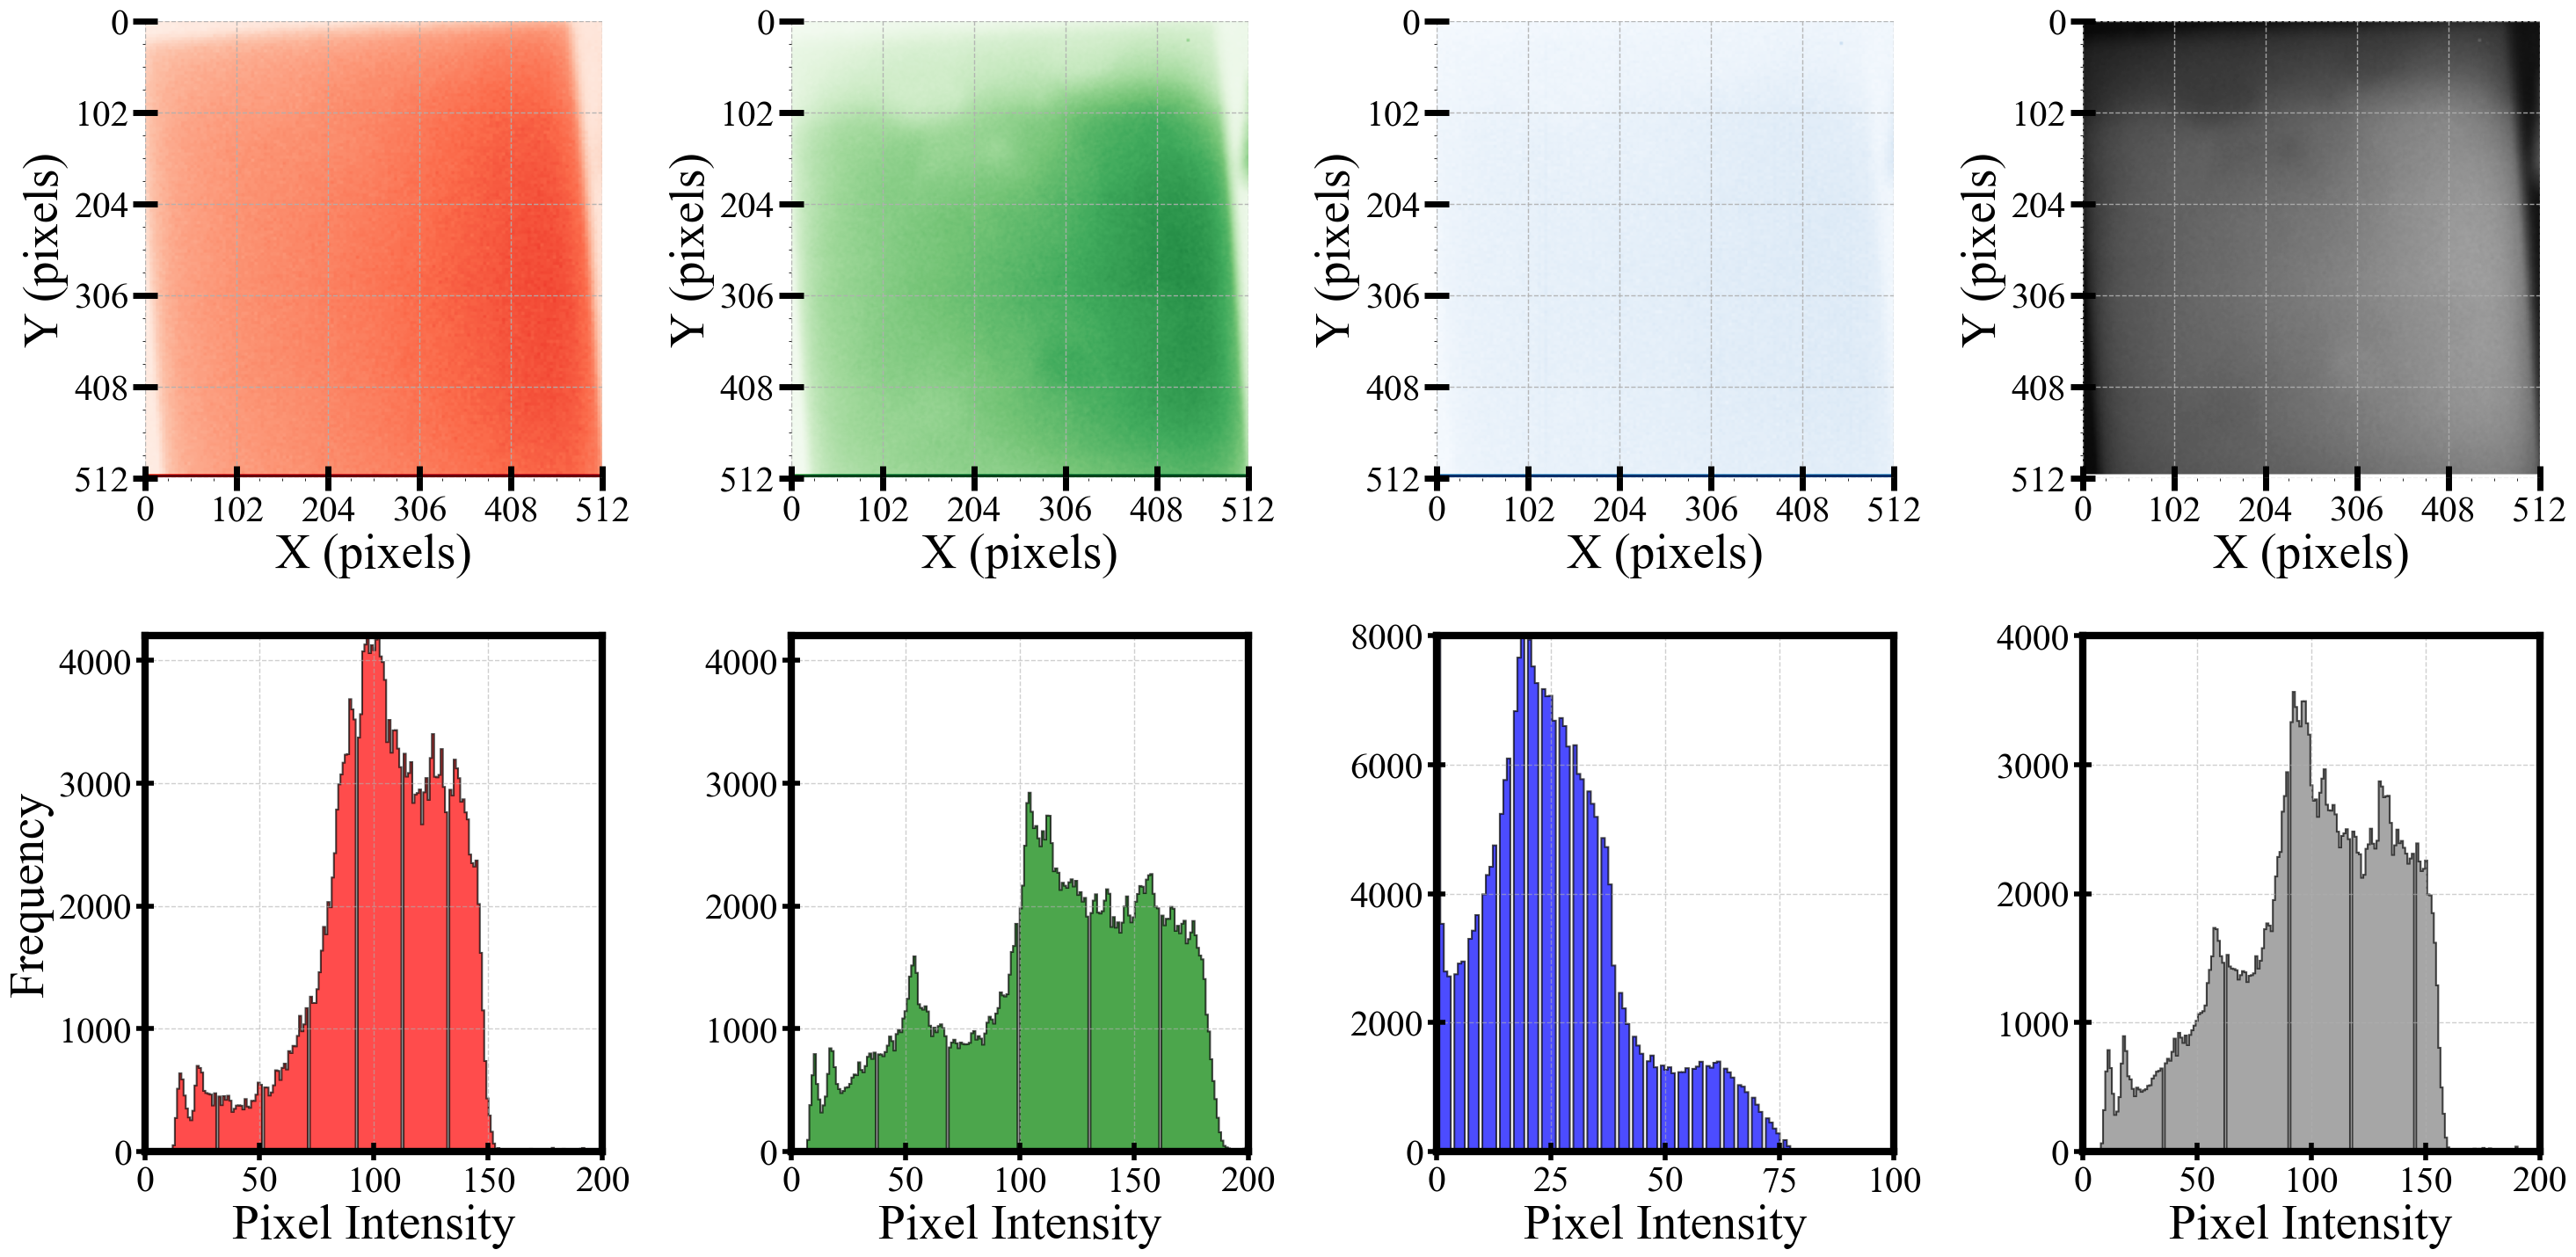

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams
from skimage import io

# === [ Global Settings for Imgae Display] ===
rcParams['font.family'] = 'Times New Roman'
rcParams['font.size'] = 30
rcParams['axes.linewidth'] = 2

# === [ Configuration ] ===
image_path = r'C:\Desktop\Data\Optode_Images_Raw\SD_64\SN_ST_R0PH_00014.png'
target_size = (512, 512)
tick_labels = ['0', '102', '204', '306', '408', '512']
tick_pos = np.linspace(0, 512, len(tick_labels))
hist_colors = ['red', 'green', 'blue', 'gray']
x_ranges = [(0, 200)] * 4
y_ranges = [(0, 4200), (0, 4200), (0, 15000), (0, 4000)]

# === [ Load and Prepare Image ] ===
def load_rgb_image(path, size):
    image = io.imread(path)
    if image.ndim == 2:
        image = np.stack([image] * 3, axis=-1)
    elif image.shape[2] == 4:
        image = image[:, :, :3]
    return cv.resize(image, size, interpolation=cv.INTER_LINEAR)

image = load_rgb_image(image_path, target_size)
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]
gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)

# === [ Axes Formatting Utilities ] ===
def format_map_axes(ax):
    ax.set_xticks(tick_pos)
    ax.set_yticks(tick_pos)
    ax.set_xticklabels(tick_labels, fontsize=30)
    ax.set_yticklabels(tick_labels, fontsize=30)
    ax.set_xlim(0, 512)
    ax.set_ylim(512, 0)
    ax.minorticks_on()
    ax.tick_params(axis='both', which='major', direction='inout', width=5, length=20)
    ax.grid(True, which='major', linestyle='--', linewidth=1, alpha=0.9)
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.set_xlabel('X (pixels)', fontsize=40, fontname='Times New Roman')
    ax.set_ylabel('Y (pixels)', fontsize=40, fontname='Times New Roman')

def format_hist_axes(ax, x_range, y_range, xlabel, show_ylabel=False):
    ax.set_xlim(x_range)
    ax.set_ylim(y_range)
    ax.tick_params(axis='both', which='major', direction='inout', width=4, length=15, labelsize=30)
    ax.minorticks_on()
    ax.tick_params(axis='both', which='minor', length=3, width=1.5)
    ax.grid(True, linestyle='--', linewidth=1, alpha=0.6)
    ax.set_xlabel(xlabel, fontsize=40, fontname='Times New Roman')
    if show_ylabel:
        ax.set_ylabel('Frequency', fontsize=40, fontname='Times New Roman')
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_linewidth(6)

# === [ Plotting ] ===
fig, axs = plt.subplots(2, 4, figsize=(30, 16))

# --- Top Row: RGB + Gray Maps ---
map_data = [R, G, B, gray]
map_cmaps = ['Reds', 'Greens', 'Blues', 'gray']
for i, (data, cmap) in enumerate(zip(map_data, map_cmaps)):
    axs[0, i].imshow(data, cmap=cmap, vmin=0, vmax=255)
    format_map_axes(axs[0, i])

# --- Bottom Row: Histograms ---
for i, data in enumerate(map_data):
    axs[1, i].hist(data.ravel(), bins=256, color=hist_colors[i], alpha=0.7,
                   histtype='stepfilled', edgecolor='black', linewidth=1.5)
    format_hist_axes(axs[1, i], x_ranges[i], y_ranges[i], 'Pixel Intensity', show_ylabel=(i == 0))

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
